In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [52]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url) # training set

In [53]:
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_df = pd.read_csv(test_url) # test set

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Info from .Describe
For numerical value
- Age features is has some NULL value
- Classification Task (1: Survive, 0: Decease)
- Fare should be correlated with Passenger Class

For other categorical value
- Most data of cabin also NULL value
- Only 2 of embarked are NULL

## Handling NaN value

In [58]:
# Simplest guess is to use Mean, Med, Mode
# In this work "Median" is selected.
age_med = train_df["Age"].median()
print(age_med)

28.0


In [59]:
train_df["Age"] = train_df["Age"].fillna(age_med)
test_df["Age"] = test_df["Age"].fillna(age_med)

In [60]:
print(train_df["Embarked"].value_counts())
train_df["Embarked"] = train_df["Embarked"].fillna("S")
test_df["Embarked"] = test_df["Embarked"].fillna("S")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [61]:
# Fare / Pclass
fareMean_P1 = train_df[train_df["Pclass"] == 1]["Fare"].mean()
fareMean_P2 = train_df[train_df["Pclass"] == 2]["Fare"].mean()
fareMean_P3 = train_df[train_df["Pclass"] == 3]["Fare"].mean()
print(fareMean_P1)
print(fareMean_P2)
print(fareMean_P3)

84.15468749999992
20.66218315217391
13.675550101832997


In [62]:
# Dealing with Fare Null 
print(test_df[test_df["PassengerId"] == 1044]['Fare'])
print(test_df[test_df["PassengerId"] == 1044]['Pclass'])

# Then
test_df.loc[test_df["PassengerId"] == 1044, "Fare"] = fareMean_P3

152   NaN
Name: Fare, dtype: float64
152    3
Name: Pclass, dtype: int64


In [63]:
test_df[test_df["PassengerId"] == 1044]['Fare']

152    13.67555
Name: Fare, dtype: float64

## Converting Categorical data

In [64]:
print(train_df["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [65]:
print(train_df["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [66]:
# Embarked
for index, unique in enumerate(train_df["Embarked"].unique()):
    train_df.loc[train_df["Embarked"]==unique, "Embarked"] = index
    test_df.loc[test_df["Embarked"]==unique, "Embarked"] = index

In [67]:
# Embarked
for index, unique in enumerate(train_df["Sex"].unique()):
    train_df.loc[train_df["Sex"]==unique, "Sex"] = index
    test_df.loc[test_df["Sex"]==unique, "Sex"] = index

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


# Data preparation

In [243]:
# Age can be less than 1, thus dtype should be float.
train_data = np.array(train_df[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
train_label = np.array(train_df["Survived"].values, dtype=int)
train_label = np.reshape(train_label, (len(train_label), 1))
train_data

array([[ 3.,  0., 22.,  0.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., 28.,  0.],
       [ 1.,  0., 26.,  1.],
       [ 3.,  0., 32.,  2.]])

In [275]:
test_data = np.array(test_df[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
test_data

array([[ 3. ,  0. , 34.5,  2. ],
       [ 3. ,  1. , 47. ,  0. ],
       [ 2. ,  0. , 62. ,  2. ],
       ...,
       [ 3. ,  0. , 38.5,  0. ],
       [ 3. ,  0. , 28. ,  0. ],
       [ 3. ,  0. , 28. ,  1. ]])

# Logistic Regression (Without validation split)

In [71]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

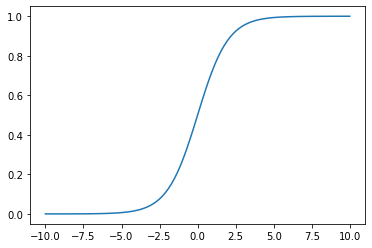

In [72]:
x = np.linspace(-10,10,100)
z = sigmoid(x)
plt.plot(x, z)

In [230]:
# Compute forward path function
def random_init_param(X):
    #size of X is [m, n] where m=sample, n=features
    W = np.random.randn(len(X[0]), 1) # +1 for Bias term
    return W

def cost_function(X, Y, H, W):
    # X : training data
    # H : prediction (before sigmoid)
    # Y : training label
    # W : trainable parameters
    m = len(Y)
    devide_zeros_threshold = 1e-5 # Solve devide by zero problem
    #L2 loss 
    L2loss = (np.dot((Y-sigmoid(H)).T, (Y-sigmoid(H))))/2 # /2 for derivative term
    # or Logistic loss
    Logistloss = np.dot(-Y.T, np.log(sigmoid(H)+devide_zeros_threshold))-np.dot((1-Y).T, np.log((1-sigmoid(H))+devide_zeros_threshold))
    cost = (1/m)*Logistloss
    grad = (1/m)*(np.dot(X.T, (sigmoid(H)-Y)))
    return cost, grad
    
def main(X, Y, W):
    h = np.dot(X, W)
    cost, grad = cost_function(X, Y, h, W)
    #update parameters
    W = W - (LR)*grad
    return W, cost

#round function uses threshold = 0.5
def predict(X, params):
    h = np.dot(X, params)
    return np.round(sigmoid(h))

def accuracy(pred, y):
    return np.squeeze(np.squeeze((sum(y == pred)/len(X))*100))

def add_bias(X):
    Bias = np.ones((len(X), 1))
    res = np.concatenate((Bias, X), axis=1)
    return res

In [231]:
###########################   TRAIN HERE    #############################

X = train_data
Y = train_label
# Add bias for training sample
X = add_bias(X)
W = random_init_param(X)
W_lowest = np.zeros((len(X[0]), 1))

LR = 0.001
epoch = 100000
best_loss = 1e6 


for i in range(epoch+1):
    W, cost = main(X, Y, W)
    pred = predict(X, W)
    if cost < best_loss:
        W_lowest = W
    if (i%1000 == 0): # Just for logging
        print("Epoch:", i+1) 
        acc = accuracy(pred, Y)
        print("Logistic loss : ", np.squeeze(cost))
        print("Training accuracy = {:.2f}%\n".format(acc))

Epoch: 1
Logistic loss :  3.943719061644017
Training accuracy = 62.40%

Epoch: 1001
Logistic loss :  0.7979615502668788
Training accuracy = 59.71%

Epoch: 2001
Logistic loss :  0.7189747253646873
Training accuracy = 60.94%

Epoch: 3001
Logistic loss :  0.6741785665526663
Training accuracy = 62.18%

Epoch: 4001
Logistic loss :  0.6452009052264166
Training accuracy = 64.31%

Epoch: 5001
Logistic loss :  0.6238022929527219
Training accuracy = 64.31%

Epoch: 6001
Logistic loss :  0.6064648479873002
Training accuracy = 64.31%

Epoch: 7001
Logistic loss :  0.5916591754656852
Training accuracy = 64.53%

Epoch: 8001
Logistic loss :  0.5786778805038203
Training accuracy = 64.42%

Epoch: 9001
Logistic loss :  0.5671552298210287
Training accuracy = 69.25%

Epoch: 10001
Logistic loss :  0.5568704057695705
Training accuracy = 70.15%

Epoch: 11001
Logistic loss :  0.5476670554220541
Training accuracy = 70.15%

Epoch: 12001
Logistic loss :  0.5394205116009971
Training accuracy = 73.85%

Epoch: 13001


# Prediction on test set
- 76.32% accuracy

In [78]:
X_test = add_bias(test_data)
test_pred = predict(X_test, W_lowest)
test_pred = np.squeeze(np.array(test_pred, dtype=int))
len(test_pred)

418

In [79]:
result = list(zip(test_df['PassengerId'].values, test_pred))
test_result = pd.DataFrame(result, columns=['PassengerId', 'Survived'], index=None)
test_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test_result.to_csv("test_prediction.csv", index=False)

# Polynomial Features

In [94]:
X

array([[ 1.,  3.,  0., 22.,  0.],
       [ 1.,  1.,  1., 38.,  1.],
       [ 1.,  3.,  1., 26.,  0.],
       ...,
       [ 1.,  3.,  1., 28.,  0.],
       [ 1.,  1.,  0., 26.,  1.],
       [ 1.,  3.,  0., 32.,  2.]])

In [276]:
def map_feature(X):
    poly_X = np.zeros((len(X), len(X[0])+6))
    for m in range(len(X)):
        term_Age = np.power(X[m][2],2)
        term_Age3 = np.power(X[m][2],3)
        term_Age4 = np.power(X[m][2],4)
        termAgeClass1 = X[m][2]*X[m][0]
        termAgeClass2 = X[m][2]*X[m][1]
        termAgeClass3 = X[m][2]*X[m][3]
        poly_X[m][:4] = X[m]
        poly_X[m][4:10] = [term_Age, term_Age3, term_Age4, termAgeClass1, termAgeClass2, termAgeClass3]
    return poly_X

# Sigmoid overflow from polynomial term, so "Norm" is must.
def feature_norm(X):
    X_norm = X
    order=len(X[0])-4
    mu = np.zeros((1, len(X_norm[0])))
    sigma = np.zeros((1, len(X_norm[0])))
    
    mu = np.mean(X_norm, axis=0)
    sigma = np.std(X_norm, axis=0)
    
    X_norm[:, 2] = (X[:, 2] - mu[2])/sigma[2]
    for i in range(order):
        X_norm[:, i+4] = (X[:, i+4] - mu[i+4])/sigma[i+4]
    return X_norm

In [277]:
###########################   TRAIN HERE    #############################

X = train_data
Y = train_label
# Add bias for training sample
X_poly = map_feature(X)
X_poly_norm = feature_norm(X_poly)
X_poly_norm = add_bias(X_poly_norm)
# Params initialize
W = random_init_param(X_poly_norm)
W_lowest = np.zeros((len(X_poly_norm[0])+1, 1))

LR = 0.005
epoch = 200000
best_loss = 1e6 

for i in range(epoch+1):
    W, cost = main(X_poly_norm, Y, W)
    pred = predict(X_poly_norm, W)
    if cost < best_loss:
        W_lowest = W
    if (i%1000 == 0): # Just for logging
        print("Epoch:", i+1)
        acc = accuracy(pred, Y)
        print("Logistic loss : ", np.squeeze(cost))
        print("Training accuracy = {:.2f}%\n".format(acc))

Epoch: 1
Logistic loss :  1.0601119527880438
Training accuracy = 52.97%

Epoch: 1001
Logistic loss :  0.5028315297133293
Training accuracy = 76.32%

Epoch: 2001
Logistic loss :  0.4614120237499157
Training accuracy = 79.12%

Epoch: 3001
Logistic loss :  0.454156676414297
Training accuracy = 78.00%

Epoch: 4001
Logistic loss :  0.4521206683546938
Training accuracy = 79.01%

Epoch: 5001
Logistic loss :  0.45118471185522957
Training accuracy = 79.24%

Epoch: 6001
Logistic loss :  0.4505849805634173
Training accuracy = 78.90%

Epoch: 7001
Logistic loss :  0.4501396804649189
Training accuracy = 78.90%

Epoch: 8001
Logistic loss :  0.449787097952114
Training accuracy = 78.90%

Epoch: 9001
Logistic loss :  0.44949746499803245
Training accuracy = 78.90%

Epoch: 10001
Logistic loss :  0.4492529271383494
Training accuracy = 78.79%

Epoch: 11001
Logistic loss :  0.44904160016559225
Training accuracy = 78.79%

Epoch: 12001
Logistic loss :  0.44885517577368983
Training accuracy = 78.68%

Epoch: 130

Epoch: 107001
Logistic loss :  0.443125925639342
Training accuracy = 78.56%

Epoch: 108001
Logistic loss :  0.44309673985440495
Training accuracy = 78.56%

Epoch: 109001
Logistic loss :  0.4430678441075196
Training accuracy = 78.56%

Epoch: 110001
Logistic loss :  0.4430392345301475
Training accuracy = 78.56%

Epoch: 111001
Logistic loss :  0.44301090733911597
Training accuracy = 78.56%

Epoch: 112001
Logistic loss :  0.44298285883364547
Training accuracy = 78.56%

Epoch: 113001
Logistic loss :  0.44295508539250383
Training accuracy = 78.56%

Epoch: 114001
Logistic loss :  0.4429275834712828
Training accuracy = 78.56%

Epoch: 115001
Logistic loss :  0.44290034959978963
Training accuracy = 78.56%

Epoch: 116001
Logistic loss :  0.44287338037955026
Training accuracy = 78.56%

Epoch: 117001
Logistic loss :  0.44284667248141707
Training accuracy = 78.56%

Epoch: 118001
Logistic loss :  0.4428202226432782
Training accuracy = 78.56%

Epoch: 119001
Logistic loss :  0.4427940276678623
Training

## Prediction on test set

In [278]:
Xtest_poly = map_feature(test_data)
Xtest_poly_norm = feature_norm(Xtest_poly)
Xtest_poly_norm = add_bias(Xtest_poly_norm)
test_pred = predict(Xtest_poly_norm, W_lowest)
test_pred = np.squeeze(np.array(test_pred, dtype=int))
len(test_pred)

418

In [279]:
result = list(zip(test_df['PassengerId'].values, test_pred))
test_result = pd.DataFrame(result, columns=['PassengerId', 'Survived'], index=None)
test_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [236]:
test_result.to_csv("test_prediction_poly.csv", index=False)

# Feature Reduction

In [239]:
# Age can be less than 1, thus dtype should be float.
train_data = np.array(train_df[["Sex", "Age"]].values, dtype=float)
train_label = np.array(train_df["Survived"].values, dtype=int)
train_label = np.reshape(train_label, (len(train_label), 1))

In [240]:
test_data = np.array(test_df[["Sex", "Age"]].values, dtype=float)

In [241]:
###########################   TRAIN HERE    #############################

X = train_data
Y = train_label
# Add bias for training sample
X = add_bias(X)
W = random_init_param(X)
W_lowest = np.zeros((len(X[0]), 1))

LR = 0.001
epoch = 100000
best_loss = 1e6 


for i in range(epoch+1):
    W, cost = main(X, Y, W)
    pred = predict(X, W)
    if cost < best_loss:
        W_lowest = W
    if (i%1000 == 0): # Just for logging
        print("Epoch:", i+1) 
        acc = accuracy(pred, Y)
        print("Logistic loss : ", np.squeeze(cost))
        print("Training accuracy = {:.2f}%\n".format(acc))

Epoch: 1
Logistic loss :  6.919759685453438
Training accuracy = 38.38%

Epoch: 1001
Logistic loss :  0.6133621733651632
Training accuracy = 66.33%

Epoch: 2001
Logistic loss :  0.6050096447915109
Training accuracy = 67.56%

Epoch: 3001
Logistic loss :  0.5975192115992749
Training accuracy = 70.82%

Epoch: 4001
Logistic loss :  0.5907887354940529
Training accuracy = 71.83%

Epoch: 5001
Logistic loss :  0.5847289780633327
Training accuracy = 72.73%

Epoch: 6001
Logistic loss :  0.5792620458062915
Training accuracy = 74.07%

Epoch: 7001
Logistic loss :  0.5743199620865185
Training accuracy = 74.75%

Epoch: 8001
Logistic loss :  0.5698433828426288
Training accuracy = 75.31%

Epoch: 9001
Logistic loss :  0.565780458362673
Training accuracy = 75.76%

Epoch: 10001
Logistic loss :  0.5620858348657238
Training accuracy = 76.09%

Epoch: 11001
Logistic loss :  0.5587197850521008
Training accuracy = 76.21%

Epoch: 12001
Logistic loss :  0.555647454759873
Training accuracy = 76.21%

Epoch: 13001
Lo

# Linear regression

In [257]:
# Compute forward path function
def random_init_param(X):
    #size of X is [m, n] where m=sample, n=features
    W = np.random.randn(len(X[0]), 1) # +1 for Bias term
    return W

def Linear_cost_function(X, Y, H, W):
    # X : training data
    # H : prediction (before sigmoid)
    # Y : training label
    # W : trainable parameters
    m = len(Y)
    devide_zeros_threshold = 1e-5 # Solve devide by zero problem
    #L2 loss 
    L2loss = (np.dot((Y-H).T, (Y-H)))/2 # /2 for derivative term
    cost = (1/m)*L2loss
    grad = (1/m)*(np.dot(X.T, (H-Y)))
    return cost, grad
    
def Linear_main(X, Y, W):
    h = np.dot(X, W)
    cost, grad = Linear_cost_function(X, Y, h, W)
    #update parameters
    W = W - (LR)*grad
    return W, cost

#round function uses threshold = 0.5
def Linear_predict(X, params):
    h = np.dot(X, params)
    return np.round(h)

def accuracy(pred, y):
    return np.squeeze(np.squeeze((sum(Y == pred)/len(X))*100))

def add_bias(X):
    Bias = np.ones((len(X), 1))
    res = np.concatenate((Bias, X), axis=1)
    return res

In [258]:
###########################   TRAIN HERE    #############################

X = train_data
Y = train_label
# Add bias for training sample
X = add_bias(X)
W = random_init_param(X)
W_lowest = np.zeros((len(X[0]), 1))

LR = 0.001
epoch = 100000
best_loss = 1e6 


for i in range(epoch+1):
    W, cost = Linear_main(X, Y, W)
    pred = Linear_predict(X, W)
    if cost < best_loss:
        W_lowest = W
    if (i%1000 == 0): # Just for logging
        print("Epoch:", i+1) 
        acc = accuracy(pred, Y)
        print("Logistic loss : ", np.squeeze(cost))
        print("Training accuracy = {:.2f}%\n".format(acc))

Epoch: 1
Logistic loss :  338.1890982575477
Training accuracy = 11.67%

Epoch: 1001
Logistic loss :  0.24681468268424797
Training accuracy = 58.70%

Epoch: 2001
Logistic loss :  0.1509986119616627
Training accuracy = 61.50%

Epoch: 3001
Logistic loss :  0.12014824629763458
Training accuracy = 64.42%

Epoch: 4001
Logistic loss :  0.10380171709933
Training accuracy = 68.46%

Epoch: 5001
Logistic loss :  0.09460042850060653
Training accuracy = 73.18%

Epoch: 6001
Logistic loss :  0.08915062581925871
Training accuracy = 77.44%

Epoch: 7001
Logistic loss :  0.0857433535486274
Training accuracy = 78.56%

Epoch: 8001
Logistic loss :  0.08348959338089357
Training accuracy = 78.56%

Epoch: 9001
Logistic loss :  0.08191185031514847
Training accuracy = 78.68%

Epoch: 10001
Logistic loss :  0.08074548869028006
Training accuracy = 78.68%

Epoch: 11001
Logistic loss :  0.0798394158590518
Training accuracy = 78.68%

Epoch: 12001
Logistic loss :  0.07910493905742265
Training accuracy = 78.68%

Epoch: 

In [263]:
W_lowest

array([[ 0.76183634],
       [-0.18509332],
       [ 0.49340374],
       [-0.00486948],
       [ 0.04927934]])

## Weight from Matrix derivation (Normal EQ.)

In [260]:
W_mat_deriv = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

In [261]:
W_mat_deriv

array([[ 0.77654442],
       [-0.18843944],
       [ 0.49086711],
       [-0.00505436],
       [ 0.04911346]])

### MSE of two weights

In [274]:
mse = np.squeeze(np.dot((W_lowest-W_mat_deriv).T, W_lowest-W_mat_deriv))
mse

array(0.00023402)